In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Analysing the preprocessed corpus

<Figure size 640x480 with 0 Axes>

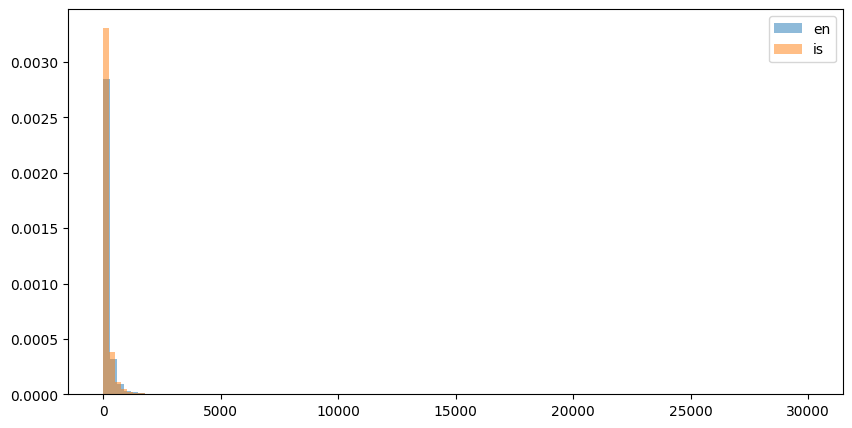

<Figure size 640x480 with 0 Axes>

In [4]:
data = pd.read_csv("data/preprocessed_is.csv", sep="\t", header=0)
# density plot of the length of the docs
plt.figure(figsize=(10, 5))
plt.hist(data.en_length, bins=100, density=True, alpha=0.5, label='en')
plt.hist(data.is_length, bins=100, density=True, alpha=0.5, label='is')
plt.legend(loc='upper right')
plt.figure()

In [24]:
data[data['en_length']<500].shape[0]/data.shape[0]

0.9291139240506329

<Figure size 640x480 with 0 Axes>

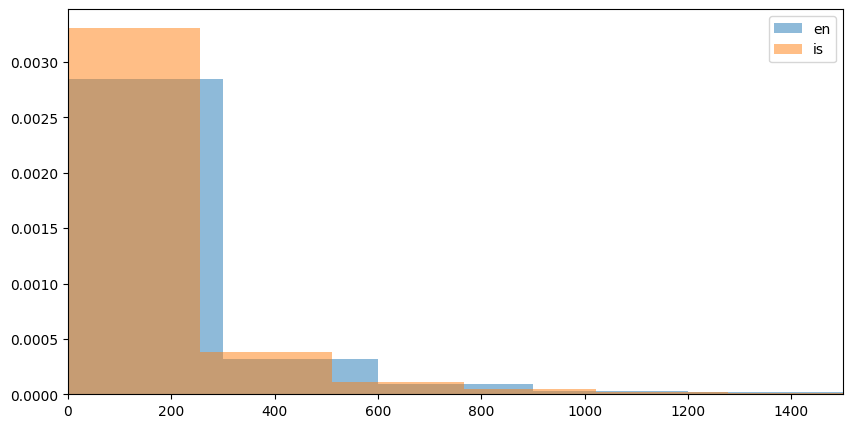

<Figure size 640x480 with 0 Axes>

In [60]:
plt.figure(figsize=(10, 5))
plt.xlim(0,1500)
plt.hist(data.en_length, bins=100, density=True, alpha=0.5, label='en')
plt.hist(data.is_length, bins=100, density=True, alpha=0.5, label='is')
plt.legend(loc='upper right')
plt.figure()

In [57]:
data[(data['en_length']<50)].shape[0]/data.shape[0]

0.37491795593061417

In [35]:
data[(data['en_length']<25)].shape[0]/data.shape[0]

0.18968588842006565

In [33]:
data[(data['en_length']<=1000) & (data['en_length']>=25)].shape[0]/data.shape[0]

0.7901078293483357

# Comapring labels for docs with different min lengths [sample]

In [88]:
label_50 = pd.read_csv("data/sample_50_labelled.csv", sep="\t", header=0)
label_75 = pd.read_csv("data/sample_75_labelled.csv", sep="\t", header=0)
label_150 = pd.read_csv("data/sample_150_labelled.csv", sep="\t", header=0)
label_25 = pd.read_csv("data/sample_25_labelled.csv", sep="\t", header=0)

In [89]:
# com{tgt_col}e label distributions of labelled samples
label_150['X-GENRE'].value_counts()

X-GENRE
Information/Explanation    148
News                       134
Instruction                 73
Promotion                   49
Opinion/Argumentation       43
Legal                       35
Other                        9
Prose/Lyrical                7
Forum                        2
Name: count, dtype: int64

In [46]:
label_75['X-GENRE'].value_counts()

X-GENRE
Information/Explanation    171
News                       118
Instruction                 58
Promotion                   56
Opinion/Argumentation       43
Legal                       33
Other                       11
Prose/Lyrical                9
Forum                        1
Name: count, dtype: int64

In [47]:
label_50['X-GENRE'].value_counts()

X-GENRE
Information/Explanation    168
News                       116
Promotion                   62
Instruction                 58
Opinion/Argumentation       38
Legal                       35
Prose/Lyrical               11
Other                        9
Forum                        3
Name: count, dtype: int64

In [48]:
label_25['X-GENRE'].value_counts()

X-GENRE
Information/Explanation    187
News                       103
Promotion                   62
Instruction                 62
Legal                       34
Opinion/Argumentation       31
Prose/Lyrical               13
Other                        6
Forum                        2
Name: count, dtype: int64

In [90]:
all_labels = label_25
# rename the column
all_labels = all_labels.rename(columns={"X-GENRE": "X-GENRE-25"})
all_labels['X-GENRE-50']=label_50['X-GENRE']
all_labels['X-GENRE-75']=label_75['X-GENRE']
all_labels['X-GENRE-150']=label_150['X-GENRE']

# change to string X-GENRE-25
all_labels['X-GENRE-25'] = all_labels['X-GENRE-25'].astype(str)
all_labels['X-GENRE-50'] = all_labels['X-GENRE-50'].astype(str)
all_labels['X-GENRE-75'] = all_labels['X-GENRE-75'].astype(str)
all_labels['X-GENRE-150'] = all_labels['X-GENRE-150'].astype(str)

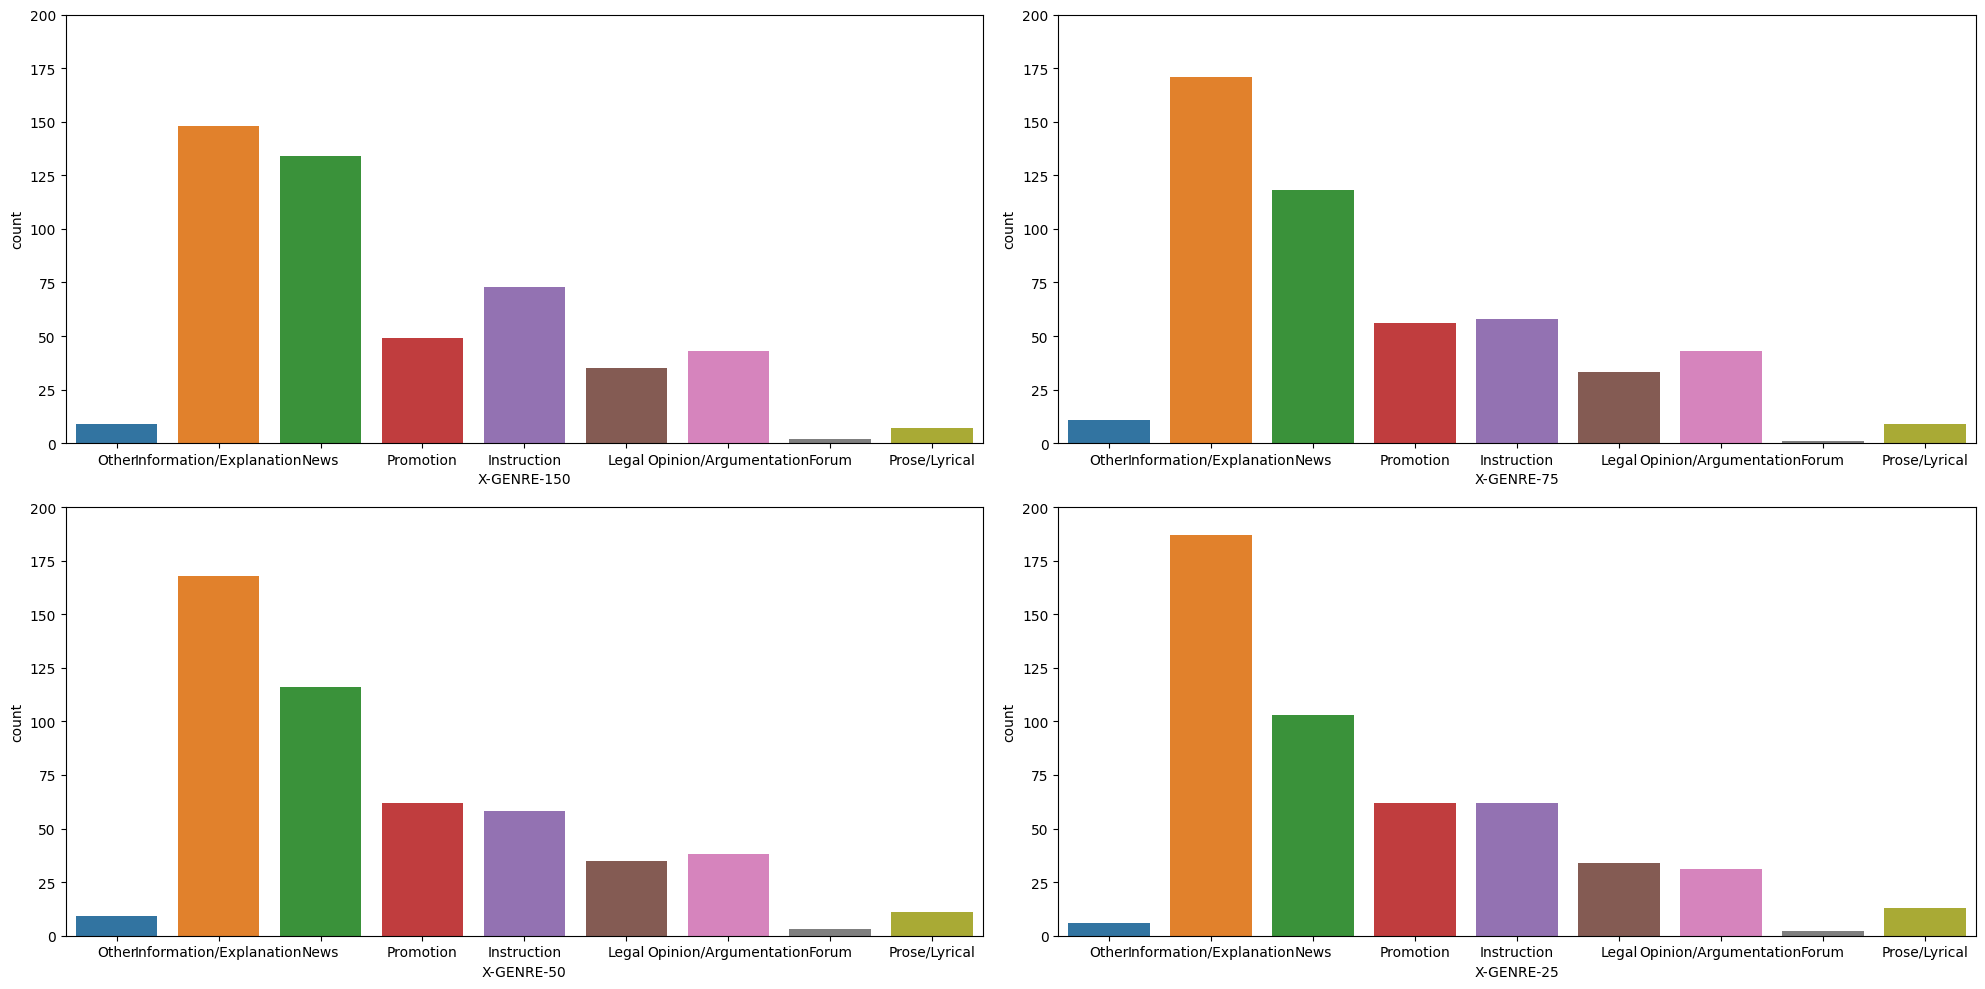

In [50]:
# plot distribution of X-GENRE-25
labels = all_labels["X-GENRE-25"].unique().tolist()

plt.figure(figsize=(20,10))

#make 4 plots in one figure
plt.subplot(2,2,1)
sns.countplot(x="X-GENRE-150", data=all_labels, order=labels)
plt.ylim(0, 200)
plt.subplot(2,2,2)
sns.countplot(x="X-GENRE-75", data=all_labels, order=labels)
plt.ylim(0, 200)
plt.subplot(2,2,3)
sns.countplot(x="X-GENRE-50", data=all_labels, order=labels)
plt.ylim(0, 200)
plt.subplot(2,2,4)
sns.countplot(x="X-GENRE-25", data=all_labels, order=labels)
plt.ylim(0, 200)
plt.tight_layout()
plt.show()

In [91]:
all_labels['label_agreement'] = all_labels.apply(lambda x: 1 if x['X-GENRE-25'] == x['X-GENRE-50'] == x['X-GENRE-75'] == x['X-GENRE-150'] else 0, axis=1)
all_labels['over_50_agree'] =  all_labels.apply(lambda x: 1 if x['X-GENRE-50'] == x['X-GENRE-75'] == x['X-GENRE-150'] else 0, axis=1)
all_labels['over_75_agree'] =  all_labels.apply(lambda x: 1 if x['X-GENRE-75'] == x['X-GENRE-150'] else 0, axis=1)
all_labels['no_agreement'] = all_labels.apply(lambda x: 1 if x['X-GENRE-25'] != x['X-GENRE-50'] != x['X-GENRE-75'] != x['X-GENRE-150'] else 0, axis=1)

In [52]:
all_labels.label_agreement.value_counts()

label_agreement
1    298
0    202
Name: count, dtype: int64

In [53]:
all_labels.over_50_agree.value_counts()

over_50_agree
1    351
0    149
Name: count, dtype: int64

In [54]:
all_labels.over_75_agree.value_counts()

over_75_agree
1    401
0     99
Name: count, dtype: int64

In [55]:
all_labels.no_agreement.value_counts()

no_agreement
0    481
1     19
Name: count, dtype: int64

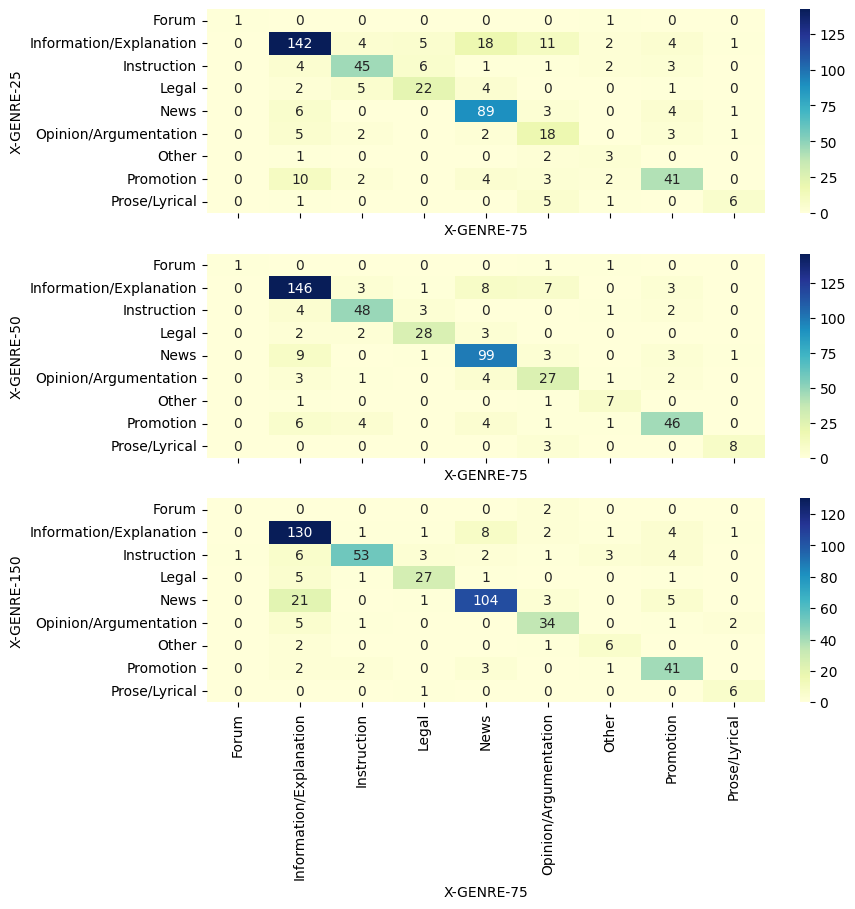

In [102]:
# make confusion matrix between all_labels['X-GENRE-25'] and all_labels['X-GENRE-75']
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True, figsize=(9, 9))
plt.subplot(311)

sns.heatmap(pd.crosstab(all_labels['X-GENRE-25'], all_labels['X-GENRE-75']), annot=True, cmap="YlGnBu", fmt='g')
# plt.title("Confusion matrix between X-GENRE-25 and X-GENRE-75")
# plt.xlabel("X-GENRE-75")
# plt.ylabel("X-GENRE-25")
plt.subplot(312)
sns.heatmap(pd.crosstab(all_labels['X-GENRE-50'], all_labels['X-GENRE-75']), annot=True, cmap="YlGnBu", fmt='g')
# plt.title("Confusion matrix between X-GENRE-50 and X-GENRE-75")
# plt.xlabel("X-GENRE-75")
# plt.ylabel("X-GENRE-50")
plt.subplot(313)
sns.heatmap(pd.crosstab(all_labels['X-GENRE-150'], all_labels['X-GENRE-75']), annot=True, cmap="YlGnBu", fmt='g')
# plt.title("Confusion matrix between X-GENRE-150 and X-GENRE-75")
# plt.xlabel("X-GENRE-75")
# plt.ylabel("X-GENRE-150")
# plt.tight_layout()
plt.show()

# Combine labels (doc-level) with sentence-level df + remove non-alphanumeric 

In [8]:
from src.preprocess_genre import preprocess
from pathlib import Path
preprocess(Path("data/"), "is", 1, drop_{tgt_col}_duplicates = True, drop_doc_duplicates = False, keep_columns=True, info = False)

In [161]:
doc_labels = pd.read_csv("data/labelled_25.csv", sep="\t", header=0)
data= pd.read_csv("data/Macocu-is-en-doc-format-duplicates.csv", sep="\t", header=0)
# select only docs longer than 25 (min thershold for genre classification)
data = data[data['en_length'] >= 25]
# remove all columns except en_doc and X-GENRE
doc_labels = doc_labels[["en_doc", "X-GENRE"]]
# merge doc_data and data based on en_doc
data = pd.merge(doc_labels, data, on="en_doc")
# remove Unnamed: 0 column
data = data.drop(columns=["Unnamed: 0"])
data.to_csv("data/Macocu-is-en-sent-doc-labelled.csv", sep="\t") 

# Label Analysis [full corpus]

In [18]:
doc_data = data.drop_duplicates(['en_doc'])

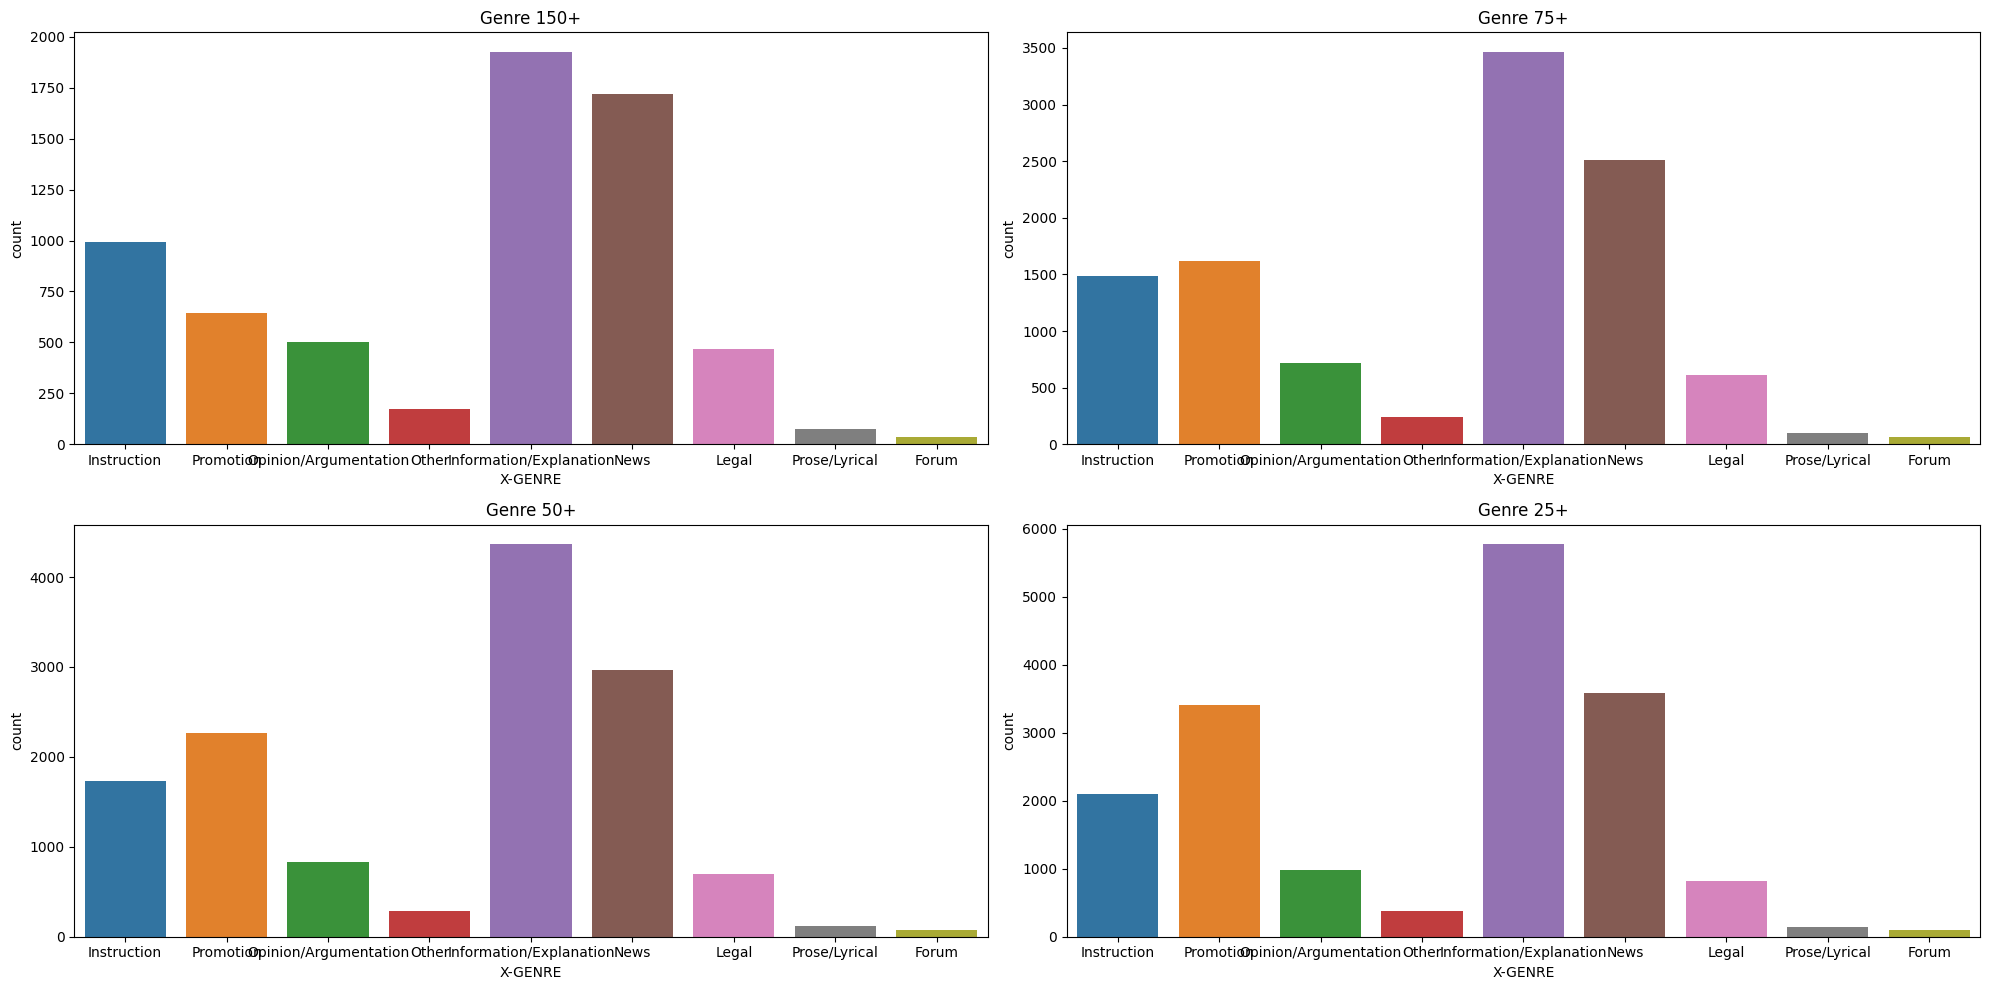

In [19]:
plt.figure(figsize=(20,10))
labels = data['X-GENRE'].unique().tolist()
#make 4 plots in one figure
plt.subplot(2,2,1)
sns.countplot(x="X-GENRE", data=doc_data[doc_data['en_length']>=150], order=labels)
plt.title("Genre 150+")
# plt.ylim(0, 6000)
plt.subplot(2,2,2)
sns.countplot(x="X-GENRE", data=doc_data[doc_data['en_length']>=75], order=labels)
plt.title("Genre 75+")
# plt.ylim(0, 6000)
plt.subplot(2,2,3)
sns.countplot(x="X-GENRE", data=doc_data[doc_data['en_length']>=50], order=labels)
plt.title("Genre 50+")
# plt.ylim(0, 6000)
plt.subplot(2,2,4)
sns.countplot(x="X-GENRE", data=doc_data[doc_data['en_length']>=25], order=labels)
plt.title("Genre 25+")
# plt.ylim(0, 6000)
plt.tight_layout()
plt.show()

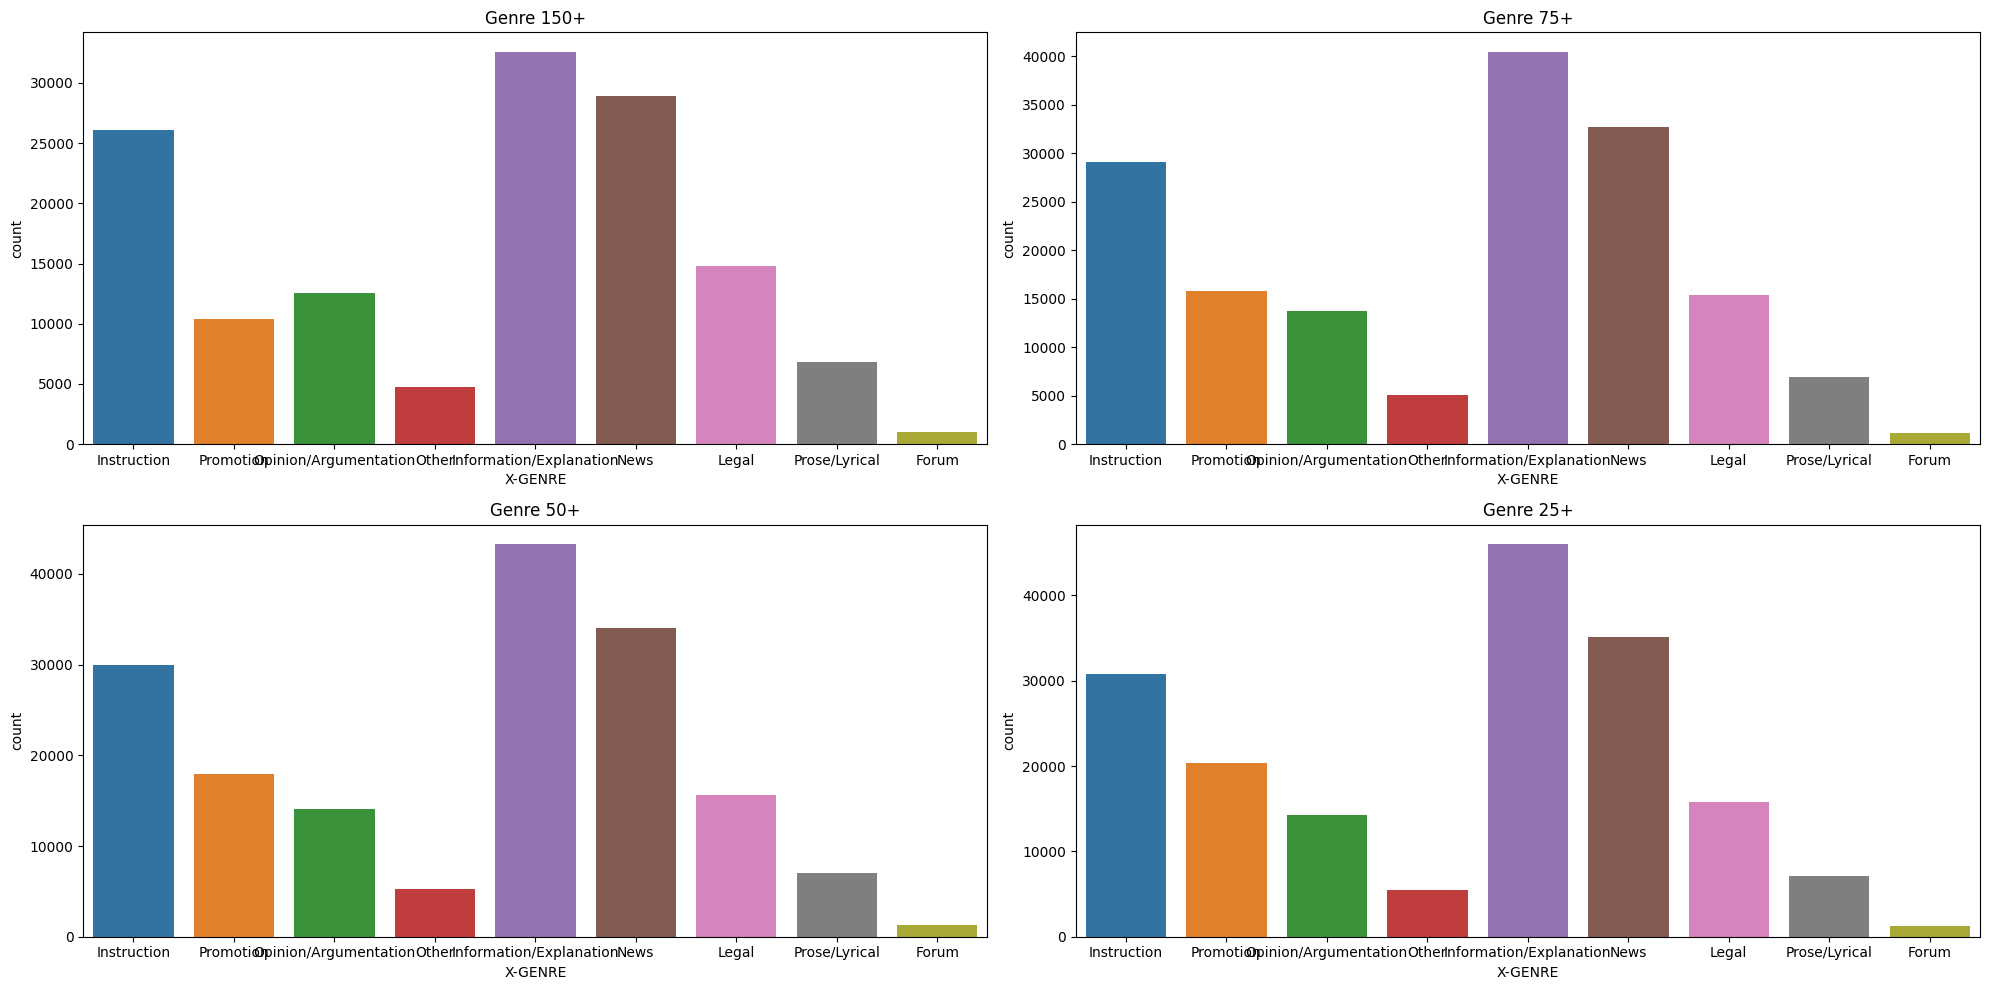

In [17]:
plt.figure(figsize=(20,10))
#make 4 plots in one figure
plt.subplot(2,2,1)
sns.countplot(x="X-GENRE", data=data[data['en_length']>=150], order=labels)
plt.title("Genre 150+")
# plt.ylim(0, 6000)
plt.subplot(2,2,2)
sns.countplot(x="X-GENRE", data=data[data['en_length']>=75], order=labels)
plt.title("Genre 75+")
# plt.ylim(0, 6000)
plt.subplot(2,2,3)
sns.countplot(x="X-GENRE", data=data[data['en_length']>=50], order=labels)
plt.title("Genre 50+")
# plt.ylim(0, 6000)
plt.subplot(2,2,4)
sns.countplot(x="X-GENRE", data=data[data['en_length']>=25], order=labels)
plt.title("Genre 25+")
# plt.ylim(0, 6000)
plt.tight_layout()
plt.show()

NameError: name 'doc_data' is not defined

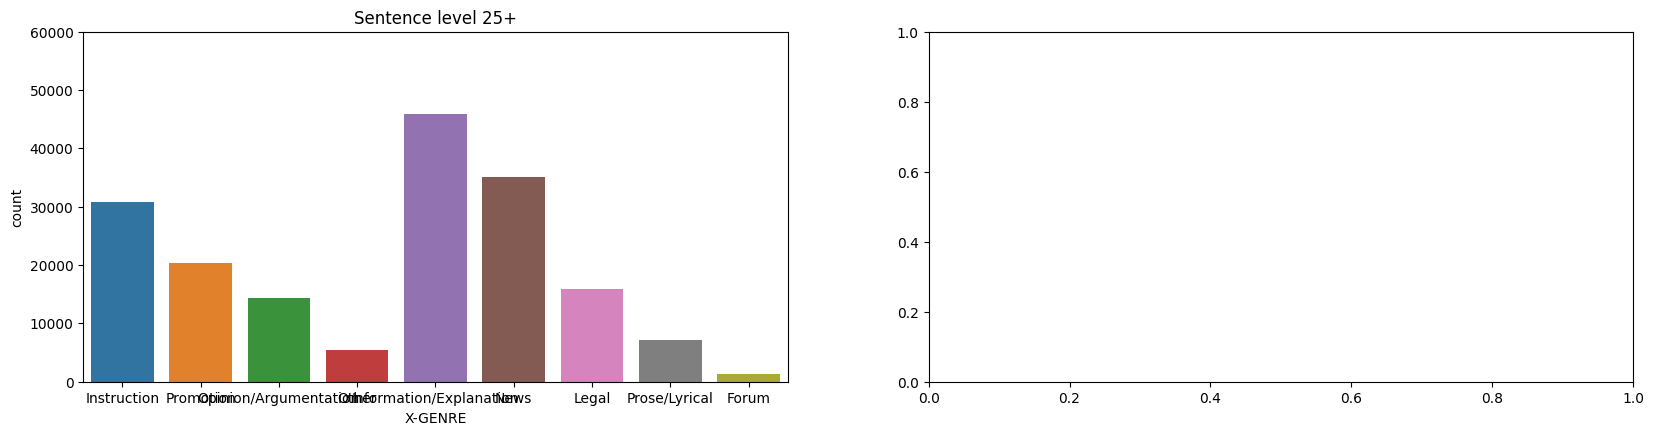

In [63]:
plt.figure(figsize=(20,10))
labels = data['X-GENRE'].unique().tolist()
#make 2 plots in one figure
plt.subplot(2,2,1)
sns.countplot(x="X-GENRE", data=data[data['en_length']>=25], order=labels)
plt.title("Sentence level 25+")
plt.ylim(0, 60000)
plt.subplot(2,2,2)
sns.countplot(x="X-GENRE", data=doc_data[doc_data['en_length']>=25], order=labels)
plt.title("Doc level 25+")
# plt.ylim(0, 50000)
plt.tight_layout()
plt.show()

In [39]:
data['{tgt_col}_count'] = data.groupby('en_doc')['en_{tgt_col}'].transform('count')

Text(0.5, 1.0, 'Average number of sentences per doc by genre')

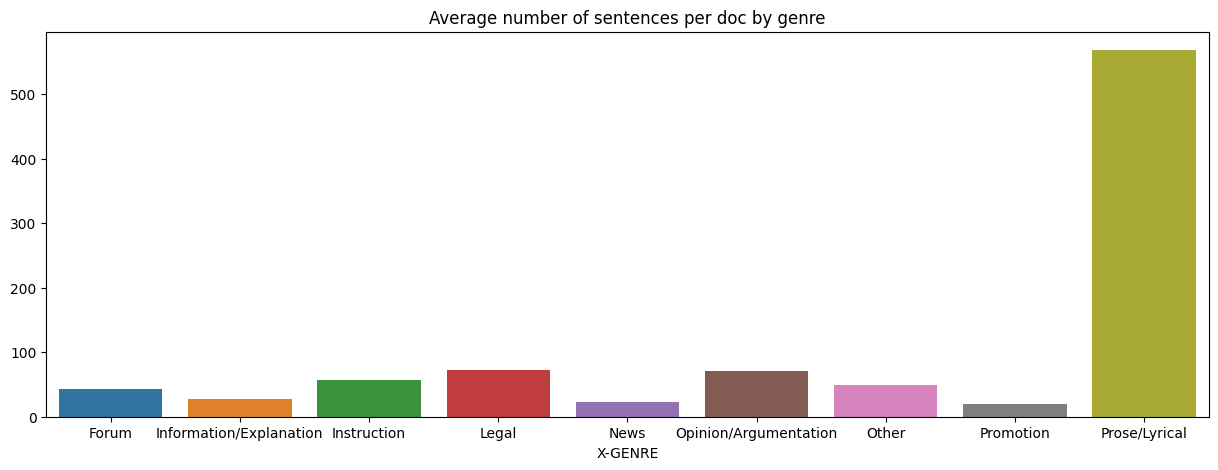

In [58]:
# plot average par_count by genre
plt.figure(figsize=(15,5))
grp = data.groupby("X-GENRE")['par_count'].mean()
for i in grp.index:
    sns.barplot(x=grp.index, y=grp.values)

plt.title("Average number of sentences per doc by genre")

In [61]:
#compute en_length per par_count per genre

data['avg_en_sent_length'] = data['en_length'] / data['par_count']
data['avg_is_sent_length'] = data['is_length'] / data['par_count']

Text(0.5, 1.0, 'Average sentence length in Icelandic by genre')

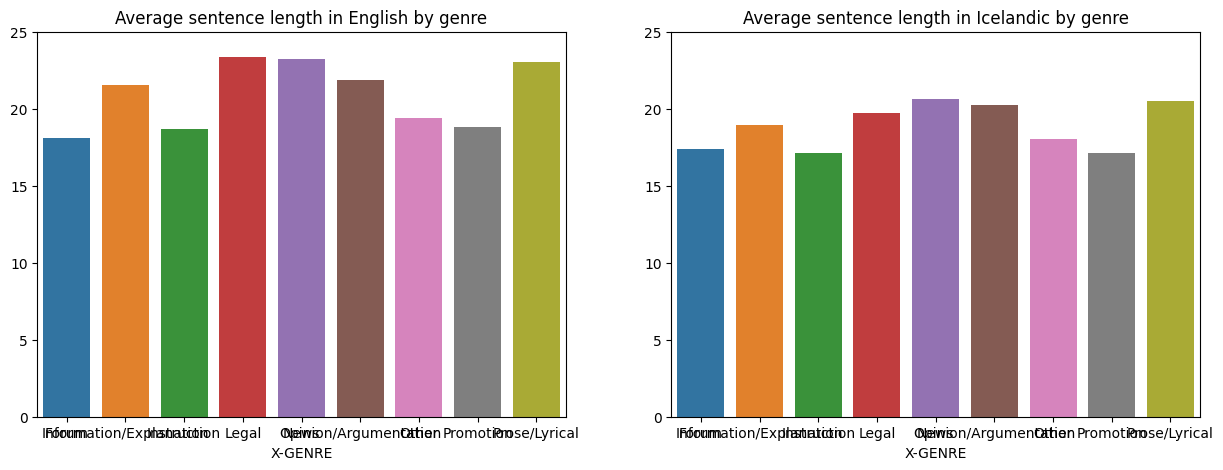

In [66]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
grp = data.groupby("X-GENRE")['avg_en_sent_length'].mean()
for i in grp.index:
    sns.barplot(x=grp.index, y=grp.values)
plt.ylim(0,25)
plt.title("Average sentence length in English by genre")
plt.subplot(1,2,2)
grp = data.groupby("X-GENRE")['avg_is_sent_length'].mean()
for i in grp.index:
    sns.barplot(x=grp.index, y=grp.values)
plt.ylim(0,25)
plt.title("Average sentence length in Icelandic by genre")


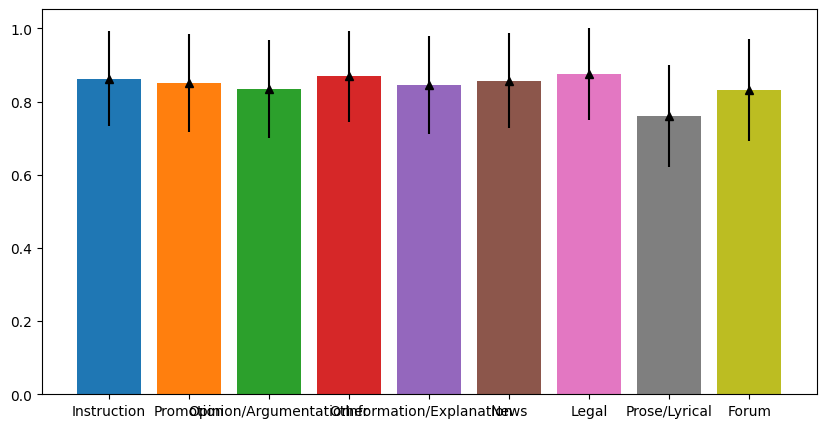

In [73]:
# plot average bi-cleaner score per genre
labels = data['X-GENRE'].unique().tolist()
plt.figure(figsize=(10, 5))
for label in labels:
    plt.bar(label,data[data['X-GENRE']==label]['score_bicleaner_ai'].mean(), label=label)
    # add standard deviation
    plt.errorbar(label, data[data['X-GENRE']==label]['score_bicleaner_ai'].mean(), data[data['X-GENRE']==label]['score_bicleaner_ai'].std(), linestyle='None', marker='^', color='black')

# Making train/dev/test splits

In [166]:

data = pd.read_csv("data/Macocu-is-en-sent-doc-labelled.csv", sep="\t")  

In [135]:
def satisfy_all_genre_counts(target_cnt, curr_cnt, genres, data):
    """ Function to check if all genre counts are satisfied.
    Args:
        target_cnt (dict): target counts for each genre
        curr_cnt (dict): current counts for each genre
        genres (list): list of genres in a given domain
        data (pandas.DataFrame): data for a given domain

    Returns:
        bool: True if all genre counts are satisfied, False otherwise
    """

    for genre in genres:
        if curr_cnt[genre] + data[data['X-GENRE']== genre]['en_par'].sum() > target_cnt[genre]:
            return False
    return True

def update_genre_counts(curr_cnt, genres, data):
    """ Function to update genre counts.
    Args:
        curr_cnt (dict): current counts for each genre
        genres (list): list of genres in a given domain
        data (pandas.DataFrame): data for a given domain
    
    Returns:
        curr_cnt (dict): updated counts for each genre
    """
    for genre in genres:
        curr_cnt[genre] += data[data['X-GENRE'] == genre]['en_par'].sum()
    return curr_cnt

def check_non_zero(test_cnt, dev_cnt):
    """ Function to check if the target counts are non-zero.
    Args:
        test_target_cnt (dict): target counts for test set
        dev_target_cnt (dict): target counts for dev set
    """
    for genre in test_cnt:
        if test_cnt[genre] == 0:
            raise ValueError("Test count for genre {} is 0".format(genre))
    for genre in dev_cnt:
        if dev_cnt[genre] == 0:
            raise ValueError("Dev  count for genre {} is 0".format(genre))

def split_data(data, test_prop= 0.1, dev_prop = 0.1, test_size = 0, dev_size = 0):
    """
    Split data into train, dev, and test sets. All splits have the same distribution of genres. 
    Internet domains of the data don't overlap bw splits.

    Args:
        data (pandas.DataFrame): data to split
        test_prop (float): proportion of data to put in test set. Default is 0.1
        dev_prop (float): proportion of data to put in dev set. Default is 0.1
        test_size (int): number of sentences to add to the test set. Default is 0. If it is greater than 0, 
            then the test_no is used instead of test_prop to determine the size of the test set.
        dev_size (int): number of sentences to add to the dev set. Default is 0. If it is greater than 0, 
            then the dev_no is used instead of dev_prop to determine the size of the dev set.
    
    Returns:
        train (pandas.DataFrame): train set
        dev (pandas.DataFrame): dev set
        test (pandas.DataFrame): test set
    """

    dom_genre = data.groupby(['en_domain','X-GENRE'])['en_par'].count().reset_index()
    labels = list(dom_genre['X-GENRE'].unique())
    ratios = {label : dom_genre[dom_genre['X-GENRE']==label]['en_par'].sum()/dom_genre['en_par'].sum() for label in labels}
    total = dom_genre['en_par'].sum()
    if test_size != 0:
        test_prop = test_size/total
    if dev_size != 0:
        dev_prop = dev_size/total
    test_target_cnt = {label: int(ratios[label] * total * test_prop) for label in ratios}
    dev_target_cnt = {label: int(ratios[label] * total * dev_prop) for label in ratios}
    test_curr_cnt = {label: 0 for label in ratios}
    dev_curr_cnt = {label: 0 for label in ratios}
    test_domains = []
    dev_domains = []
    train_domains = []

    for domain in dom_genre['en_domain'].unique():
        # print(domain)
        genres = list(dom_genre[dom_genre['en_domain']==domain]['X-GENRE'])
        if satisfy_all_genre_counts(test_target_cnt, test_curr_cnt, genres, dom_genre[dom_genre['en_domain'] == domain]):
            test_curr_cnt = update_genre_counts(test_curr_cnt, genres, dom_genre[dom_genre['en_domain'] == domain])
            test_domains.append(domain)
        elif satisfy_all_genre_counts(dev_target_cnt, dev_curr_cnt, genres, dom_genre[dom_genre['en_domain'] == domain]):
            dev_curr_cnt = update_genre_counts(dev_curr_cnt, genres, dom_genre[dom_genre['en_domain'] == domain])
            dev_domains.append(domain)
        else:
            train_domains.append(domain)
    
    check_non_zero(test_curr_cnt, dev_curr_cnt)

    test = data[data['en_domain'].isin(test_domains)]
    dev = data[data['en_domain'].isin(dev_domains)]
    train = data[data['en_domain'].isin(train_domains)]

    return train, dev, test

In [136]:
train, dev, test = split_data(data,test_size=5000, dev_size=5000)

# Analyze the datasets 

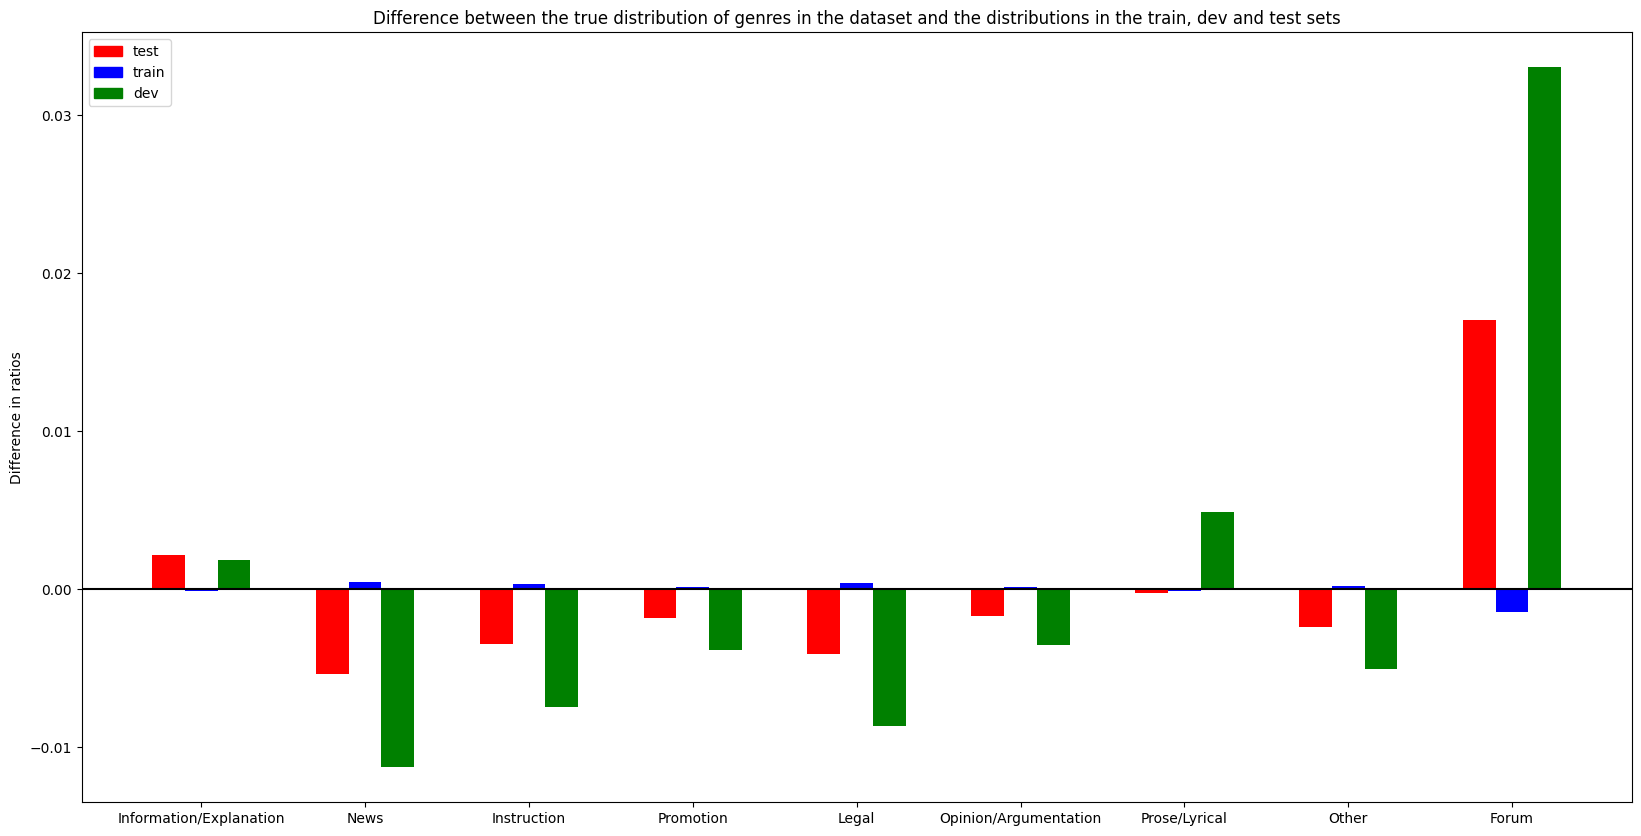

In [142]:
# group by genres the ratios and plot them as bar plots 
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

red_patch = mpatches.Patch(color='red', label='test')
blue_patch = mpatches.Patch(color='blue', label='train')
green_patch = mpatches.Patch(color='green', label='dev')

plt.figure(figsize=(20,10))
width = 0.2

ratios = data['X-GENRE'].value_counts()/data.shape[0]
test_ratios = ratios - test['X-GENRE'].value_counts()/test.shape[0]
dev_ratios = ratios - dev['X-GENRE'].value_counts()/dev.shape[0]
train_ratios = ratios - train['X-GENRE'].value_counts()/train.shape[0]

x = np.arange(len(train_ratios.keys()))
i = 0
for genre in test_ratios.keys():
    plt.bar(x[i]-0.2, test_ratios[genre], width = width, color = 'red', label='test')
    plt.bar(x[i], train_ratios[genre], label='train', width = width, color = 'blue')
    plt.bar(x[i]+0.2, dev_ratios[genre], label='dev', width = width, color = 'green')
    x += 1
plt.xticks(np.arange(len(train_ratios.keys())), train_ratios.keys())
# add horizontal line at 0 
plt.axhline(y=0, color='black', linestyle='-')
plt.ylabel('Difference in ratios')
plt.title('Difference between the true distribution of genres in the dataset and the distributions in the train, dev and test sets')
plt.legend(handles=[red_patch, blue_patch, green_patch])


Text(0.5, 1.0, 'Dev Data')

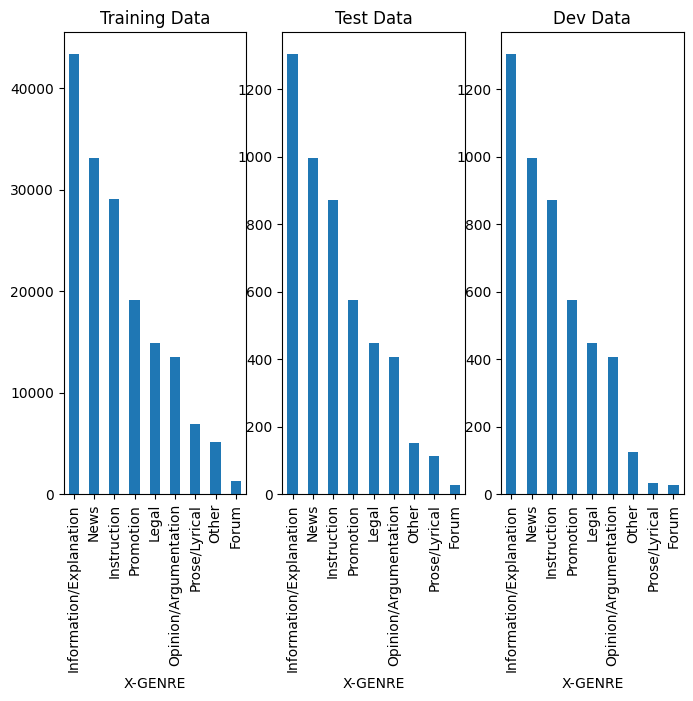

In [144]:
# check the distribution of genres in the training data
fig = plt.figure(figsize=(8,6))
plt.subplot(1,3,1)
train['X-GENRE'].value_counts().plot(kind='bar')
plt.title('Training Data')
plt.subplot(1,3,2)
test['X-GENRE'].value_counts().plot(kind='bar')
plt.title('Test Data')
plt.subplot(1,3,3)
dev['X-GENRE'].value_counts().plot(kind='bar')
plt.title('Dev Data')

Text(0.5, 1.0, 'Test data')

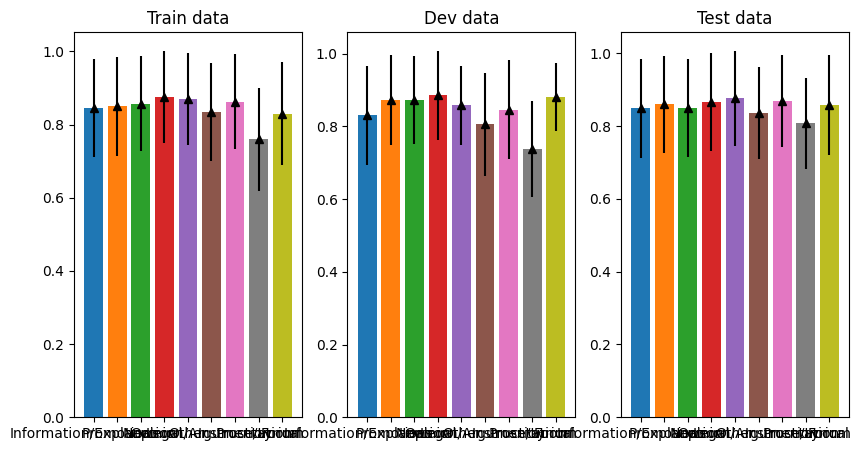

In [148]:
plt.figure(figsize=(10, 5))
labels = train['X-GENRE'].unique().tolist()
plt.subplot(1, 3, 1)
for label in labels:
    plt.bar(label,train[train['X-GENRE']==label]['score_bicleaner_ai'].mean(), label=label)
    # add standard deviation
    plt.errorbar(label, train[train['X-GENRE']==label]['score_bicleaner_ai'].mean(), train[train['X-GENRE']==label]['score_bicleaner_ai'].std(), linestyle='None', marker='^', color='black')
plt.title('Train data')
plt.subplot(1, 3, 2)
for label in labels:
    plt.bar(label,dev[dev['X-GENRE']==label]['score_bicleaner_ai'].mean(), label=label)
    # add standard deviation
    plt.errorbar(label, dev[dev['X-GENRE']==label]['score_bicleaner_ai'].mean(), dev[dev['X-GENRE']==label]['score_bicleaner_ai'].std(), linestyle='None', marker='^', color='black')
plt.title('Dev data')
plt.subplot(1, 3, 3)
for label in labels:
    plt.bar(label,test[test['X-GENRE']==label]['score_bicleaner_ai'].mean(), label=label)
    # add standard deviation
    plt.errorbar(label, test[test['X-GENRE']==label]['score_bicleaner_ai'].mean(), test[test['X-GENRE']==label]['score_bicleaner_ai'].std(), linestyle='None', marker='^', color='black')
plt.title('Test data')


In [146]:
# Check translation direction distribution
display(train.translation_direction.value_counts()/train.shape[0])
display(dev.translation_direction.value_counts()/dev.shape[0])
display(test.translation_direction.value_counts()/test.shape[0])

translation_direction
first-orig-second-ht    0.511522
second-orig-first-ht    0.217238
first-orig-second-mt    0.137632
second-orig-first-mt    0.133608
Name: count, dtype: float64

translation_direction
first-orig-second-ht    0.512002
second-orig-first-ht    0.238990
second-orig-first-mt    0.126278
first-orig-second-mt    0.122730
Name: count, dtype: float64

translation_direction
first-orig-second-ht    0.523994
second-orig-first-ht    0.209108
first-orig-second-mt    0.140290
second-orig-first-mt    0.126608
Name: count, dtype: float64

In [84]:
set(test.en_domain.unique()).intersection(set(train.en_domain.unique())).intersection(set(dev.en_domain.unique()))

set()

In [167]:
data['X-GENRE'].unique()

array(['Instruction', 'Promotion', 'Opinion/Argumentation', 'Other',
       'Information/Explanation', 'News', 'Legal', 'Prose/Lyrical',
       'Forum'], dtype=object)

In [14]:
def save_datasets(train, dev, test, tgt_lang, tgt_col, path, name):
    """
    Saves the datasets to tsv files with and without genre tokens, also saves complete dataframe where all 
    datasets are merged and 'set' column shows the set of each row.

    Args:
        train (pd.DataFrame): train dataset
        dev (pd.DataFrame): dev dataset
        test (pd.DataFrame): test dataset
        tgt_lang (str): target language
        path (str): path to save the files
        name (str): name of the files

    """
    # save all columns to tsv if it doesn't exist 
    if not os.path.exists(path + name + '_complete.tsv'):
        # merge columns add test, dev or train to new column 'set'
        train['set'] = ['train'] * train.shape[0]
        dev['set'] = ['dev'] * dev.shape[0]
        test['set'] = ['test'] * test.shape[0]
        # merge all datasets
        df = pd.concat([train, dev, test])
        df.to_csv(path + name + '_complete.tsv', sep='\t', index=False)
    # save only en_par and is_par columns to csv

    train[[f'en_{tgt_col}', f'{tgt_lang}_{tgt_col}']].to_csv(path + name + '.train.tsv', sep='\t', index=False, header=False)
    dev[[f'en_{tgt_col}', f'{tgt_lang}_{tgt_col}']].to_csv(path + name + '.dev.tsv', sep='\t', index=False, header=False)
    test[[f'en_{tgt_col}', f'{tgt_lang}_{tgt_col}']].to_csv(path + name + '.test.tsv', sep='\t', index=False, header=False)
    
    # add token in from of en_par according to mapping
    genre_tokens = {'Prose/Lyrical': '>>lit<<','Instruction': '>>instr<<', 'Promotion': '>>promo<<', 'Opinion/Argumentation': '>>arg<<' , 'Other': '>>other<<' , 'Information/Explanation': '>>info<<', 'News': '>>news<<', 'Legal': '>>law<<', 'Forum': 
                    '>>forum<<'}

    # make column "tokens" with genre tokens 
    train['tokens'] = train['X-GENRE'].replace(genre_tokens)
    dev['tokens'] = dev['X-GENRE'].replace(genre_tokens)
    test['tokens'] = test['X-GENRE'].replace(genre_tokens)

    # merge genre tokens with en_par in new column en_par_tokens as string
    train[f'en_{tgt_col}_tokens'] = train['tokens'] + ' ' + train[f'en_{tgt_col}']
    dev[f'en_{tgt_col}_tokens'] = dev['tokens'] + ' ' + dev[f'en_{tgt_col}']
    test[f'en_{tgt_col}_tokens'] = test['tokens'] + ' ' + test[f'en_{tgt_col}']


    # save en_par and tgt_lang_par with genre tokens

    train[[f'en_{tgt_col}_tokens', f'{tgt_lang}_{tgt_col}']].to_csv(path + name + '.train.tag.tsv', sep='\t', index=False, header=False)
    dev[[f'en_{tgt_col}_tokens', f'{tgt_lang}_{tgt_col}']].to_csv(path + name + '.dev.tag.tsv', sep='\t', index=False, header=False)
    test[[f'en_{tgt_col}_tokens', f'{tgt_lang}_{tgt_col}']].to_csv(path + name + '.test.tag.tsv', sep='\t', index=False, header=False)

    print('Saved datasets to ' + path + name + '.tsv and ' + path + name + '.tag.tsv and ' + path + name + '_complete.tsv')



In [17]:
import os
save_datasets(train, dev, test, "is", "doc", "data/en-is/", "MaCoCu.en-is")

KeyError: "None of [Index(['en_doc', 'is_doc'], dtype='object')] are in the [columns]"

# Scratch

In [4]:
import pandas as pd
flores_dev = pd.read_csv("data/en-is/flores_dev.en-is.tsv", sep="\t", header=None)
flores_devtest = pd.read_csv("data/en-is/flores_devtest.en-is.tsv", sep="\t", header=None)


In [7]:
flores_devtest.columns

Index([0, 1], dtype='int64')

In [13]:
flores_dev['en_length'] = flores_dev[0].apply(lambda x: len(x.split()))
flores_devtest['en_length'] = flores_devtest[0].apply(lambda x: len(x.split()))

In [18]:
flores_dev[flores_dev['en_length']>=25].shape

(259, 4)

In [161]:
from prettytable import PrettyTable
import pandas as pd
import argparse

parser = argparse.ArgumentParser(description='Args to summarize evaluation scores.')
parser.add_argument('--folder', type=str, help='the folder where the evaluation files are stored')
parser.add_argument('--fname', type=str, help='the name of the file with predictions')
parser.add_argument('--ref_with_tags', type=str, help='the path to the reference file with tags (to determine the genres)')

def read_scores(folder, fname, ref_with_tags):
    ''' Reads the scores from the evaluation files and returns a dataframe with the scores and the genres. 
    
    Args:
    - folder (str): the folder where the evaluation files are stored
    - fname (str): the name of the file with predictions
    - ref_with_tags (str): the path to the reference file with tags (to determine the genres)
    
    Returns:
    - res (pandas DataFrame): a dataframe with the scores and the genres'''


    ref_with_tags = pd.read_csv(ref_with_tags, sep='\t', header=0)
    tokens_to_genres = {'>>info<<': 'Information/Explanation', '>>promo<<': 'Promotion', '>>news<<': 'News', '>>law<<': 'Legal', '>>other<<': 'Other', '>>arg<<': 'Opinion/Argumentation', '>>instr<<': 'Instruction', '>>lit<<': 'Prose/Lyrical', '>>forum<<': 'Forum'}
    genres = [tokens_to_genres[line.split(' ')[0]] for line in ref_with_tags.en_par_tokens.to_list()]
    
    bleu = float(open(folder + fname + "_predictions.txt.eval.bleu", "r").readlines()[0].strip('\n'))
    ter = float(open(folder + fname + "_predictions.txt.eval.ter", "r").readlines()[0].strip('\n'))
    chrf = float(open(folder + fname + "_predictions.txt.eval.chrf", "r").readlines()[0].strip('\n'))
    chrfpp = float(open(folder + fname + "_predictions.txt.eval.chrfpp", "r").readlines()[0].strip('\n'))
    bleurt = [float(l) for l in open(folder + fname + "_predictions.txt.eval.bleurt", "r").readlines()]
    # 2,4,6 precison, recall, f1
    bert_score = open(folder + fname + '_predictions.txt.eval.bertscore', 'r').readlines()[0].strip('\n').split(' ')
    comet = [float(l.split(" ")[-1].strip()) for l in open(folder + fname + "_predictions.txt.eval.comet", "r").readlines()]

    res = pd.DataFrame()
    res['genre'] = genres
    res['bert_score_f1'] = [float(bert_score[6])] * len(genres)
    res['bert_score_p'] = [float(bert_score[2])] * len(genres)
    res['bert_score_r'] = [float(bert_score[4])] * len(genres)
    res['bleu'] = [bleu] * len(genres)
    res['ter'] = [ter] * len(genres)
    res['chrf'] = [chrf] * len(genres)
    res['chrfpp'] = [chrfpp] * len(genres)
    res['comet_avg'] = [comet[-1]] * len(genres)
    res['comet'] = comet[:-1]
    res['bleurt'] = bleurt

    return res


args = parser.parse_args()

res = read_scores(args.folder, args.fname, args.ref_with_tags)

x = PrettyTable()
x.field_names = ["Test file", "BLEU", "COMET", "TER", "chrF", "chrFpp", "BertScore_f1", "BertScore_precision", "BertScore_recall"]
row = [args.name, round(res['bleu'].iloc[0],3), round(res['comet_avg'].iloc[0],3), round(res['ter'].iloc[0],3), round(res['chrf'].iloc[0],3), round(res['chrfpp'].iloc[0],3), round(res['bert_score_f1'].iloc[0],3), round(res['bert_score_p'].iloc[0],3), round(res['bert_score_r'].iloc[0],3)]
x.add_row(row)

y = PrettyTable()
y.add_column("Genre", list(res.groupby('genre').groups.keys()))
y.add_column('BLEURT', [round(s,3) for s in res.groupby('genre').mean()['bleurt'].to_list()])
y.add_column('COMET', [round(s,3) for s in res.groupby('genre').mean()['comet'].to_list()])
y.add_column('Count', [round(s,3) for s in res.groupby('genre').count()['bleurt'].to_list()])


with open(args.folder + args.fname + '_summary.txt', 'w') as w:
    w.write(str(x))
    w.write("\n\n")
    w.write(str(y.get_string(sortby="Count", reversesort=True)))



In [166]:
print(x)

+----------------+------+-------+------+------+--------+--------------+---------------------+------------------+
|   Test file    | BLEU | COMET | TER  | chrF | chrFpp | BertScore_f1 | BertScore_precision | BertScore_recall |
+----------------+------+-------+------+------+--------+--------------+---------------------+------------------+
| flores_devtest | 18.3 |  0.76 | 73.3 | 48.6 |  45.4  |    0.919     |        0.919        |      0.919       |
+----------------+------+-------+------+------+--------+--------------+---------------------+------------------+


In [162]:
print(y.get_string(sortby="Count", reversesort=True))

+-------------------------+--------+-------+-------+
|          Genre          | BLEURT | COMET | Count |
+-------------------------+--------+-------+-------+
| Information/Explanation |  0.62  | 0.753 |  512  |
|  Opinion/Argumentation  |  0.66  |  0.78 |  195  |
|          Legal          | 0.627  | 0.762 |  142  |
|       Instruction       | 0.593  | 0.739 |   76  |
|        Promotion        | 0.626  | 0.765 |   64  |
|           News          | 0.654  | 0.781 |   18  |
|          Other          | 0.776  | 0.797 |   3   |
|      Prose/Lyrical      | 0.598  | 0.807 |   2   |
+-------------------------+--------+-------+-------+


In [18]:
dat = pd.read_csv("data/en-is/MaCoCu.en-is_complete.tsv", sep="\t", header=0)

In [19]:
def doc_level_sets(data):
    """ Function to make doc level sets from sentence level sets. 
    Args:
        data (pandas.DataFrame): data to split
    
    Returns:
        train (pandas.DataFrame): train set
        dev (pandas.DataFrame): dev set
        test (pandas.DataFrame): test set
    """
    # make doc level sets
    train = data[data['set'] == 'train'].drop_duplicates(['en_doc'])
    dev = data[data['set'] == 'dev'].drop_duplicates(['en_doc'])
    test = data[data['set'] == 'test'].drop_duplicates(['en_doc'])
    return train, dev, test

In [21]:
import os
train, dev, test = doc_level_sets(dat)
save_datasets(train, dev, test, "is", "par", "data/en-is/", "MaCoCu.en-is")

Saved datasets to data/en-is/MaCoCu.en-is.tsv and data/en-is/MaCoCu.en-is.tag.tsv and data/en-is/MaCoCu.en-is_complete.tsv


In [4]:
import pandas as pd
dat = pd.read_csv("data/en-is/MaCoCu.en-is_complete.tsv", sep="\t", header=0)

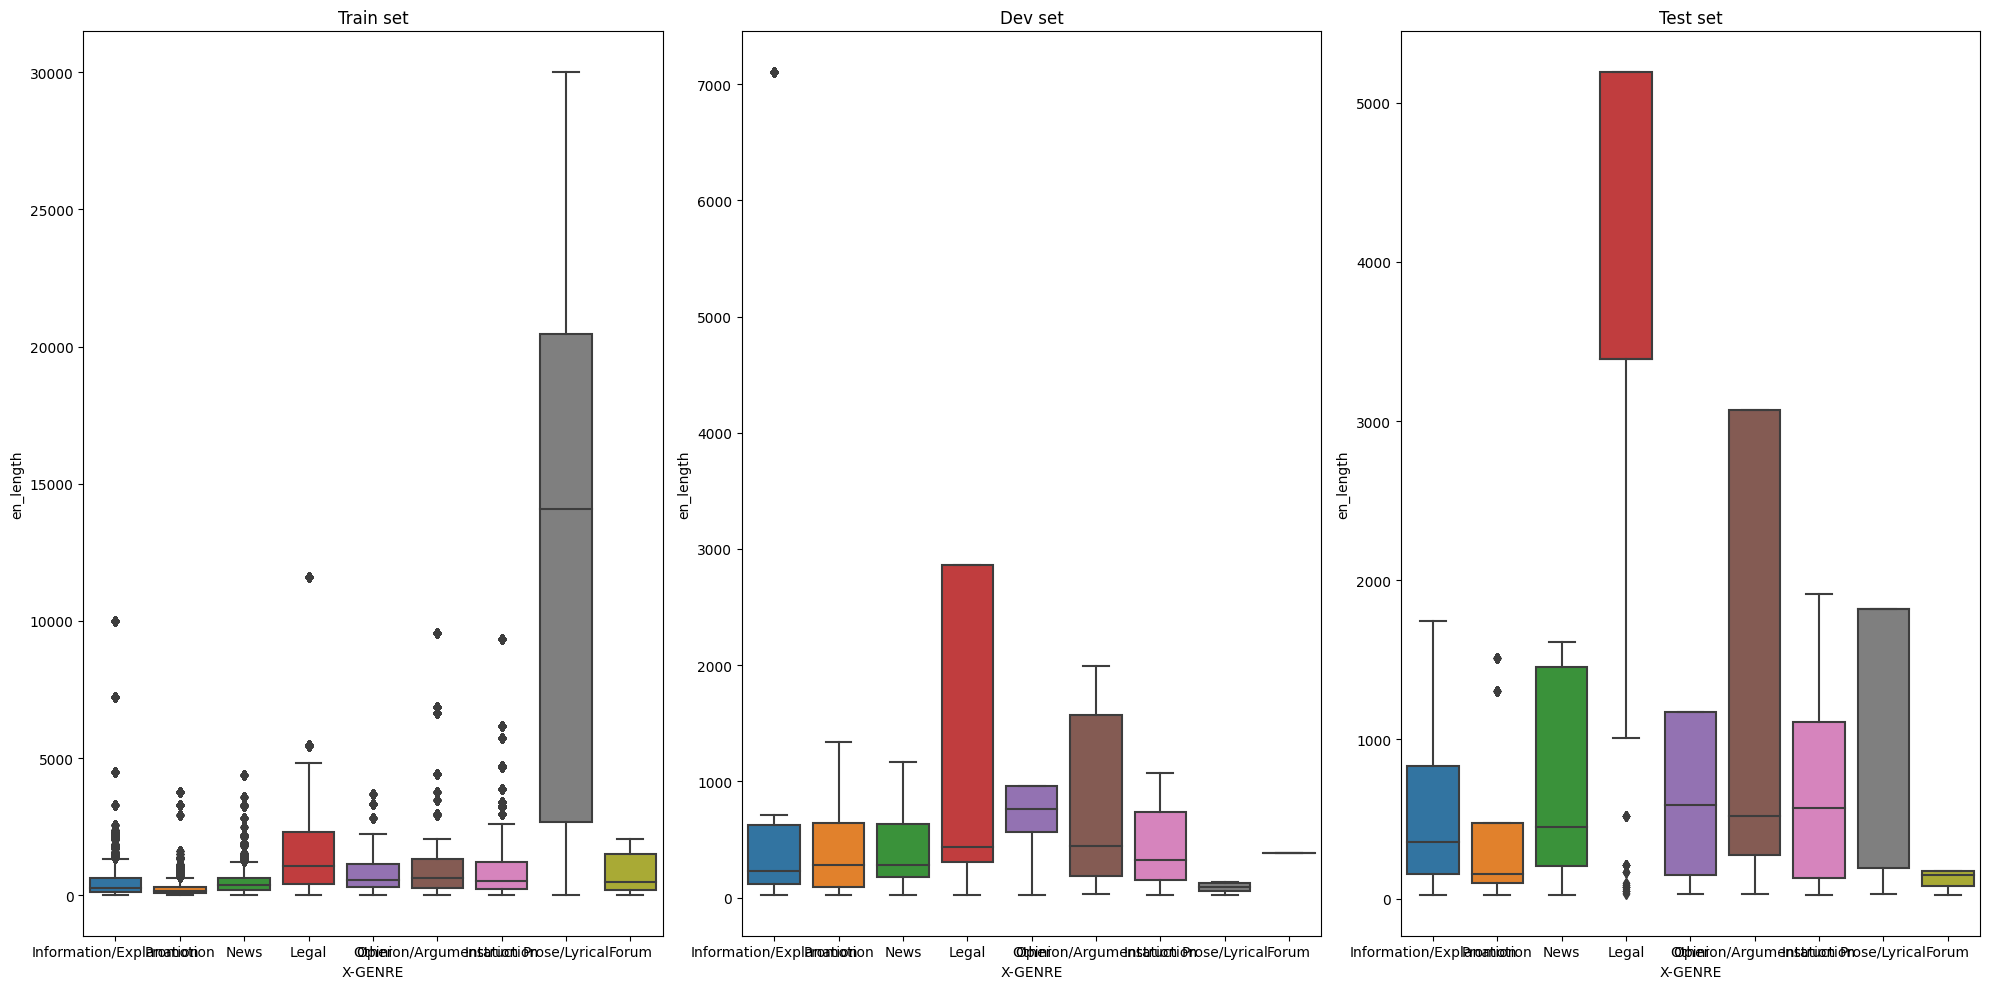

In [6]:
# plot en_length by genre by set
plt.figure(figsize=(20,10))
labels = dat['X-GENRE'].unique().tolist()
#make 3 plots in one figure
plt.subplot(1,3,1)
sns.boxplot(x="X-GENRE", y="en_length", data=dat[dat['set']=='train'], order=labels)
plt.title("Train set")
# plt.ylim(0, 1000)
plt.subplot(1,3,2)
sns.boxplot(x="X-GENRE", y="en_length", data=dat[dat['set']=='dev'], order=labels)
plt.title("Dev set")
# plt.ylim(0, 1000)
plt.subplot(1,3,3)
sns.boxplot(x="X-GENRE", y="en_length", data=dat[dat['set']=='test'], order=labels)
plt.title("Test set")
# plt.ylim(0, 1000)
plt.tight_layout()
plt.show()

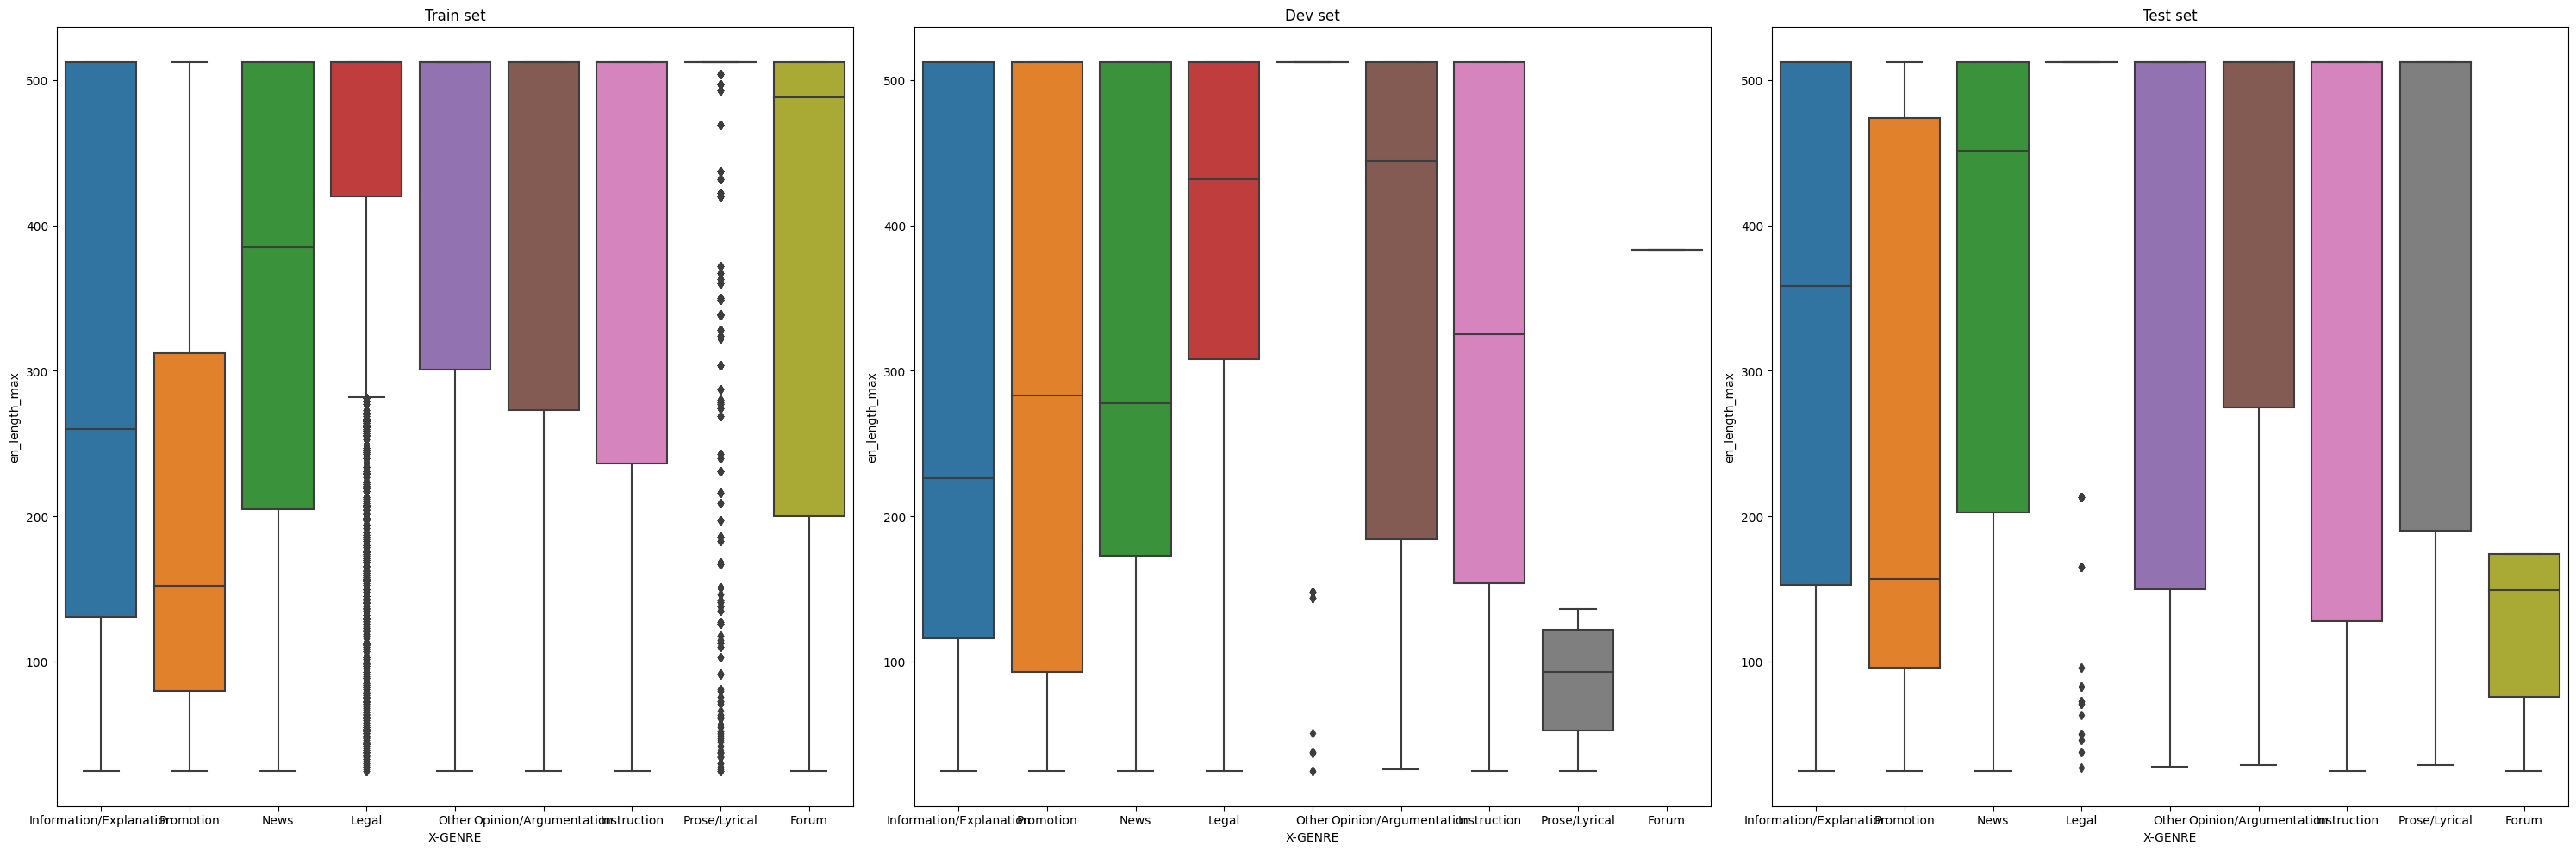

In [9]:
# where en_length > 512 en_length_max = 512, else en_length_max = en_length
dat['en_length_max'] = dat.apply(lambda x: 512 if x['en_length'] > 512 else x['en_length'], axis=1)

# plot en_length by genre by set
plt.figure(figsize=(30,10))
labels = dat['X-GENRE'].unique().tolist()
#make 3 plots in one figure
plt.subplot(1,3,1)
sns.boxplot(x="X-GENRE", y="en_length_max", data=dat[dat['set']=='train'], order=labels)
plt.title("Train set")
# plt.ylim(0, 1000)
plt.subplot(1,3,2)
sns.boxplot(x="X-GENRE", y="en_length_max", data=dat[dat['set']=='dev'], order=labels)
plt.title("Dev set")
# plt.ylim(0, 1000)
plt.subplot(1,3,3)
sns.boxplot(x="X-GENRE", y="en_length_max", data=dat[dat['set']=='test'], order=labels)
plt.title("Test set")
# plt.ylim(0, 1000)
plt.tight_layout()
plt.show()

In [24]:
# number of X-genre per set
dat.groupby('set')['X-GENRE'].value_counts()

set    X-GENRE                
dev    Information/Explanation     1304
       News                         996
       Instruction                  873
       Promotion                    577
       Legal                        449
       Opinion/Argumentation        406
       Other                        125
       Prose/Lyrical                 34
       Forum                         27
test   Information/Explanation     1304
       News                         996
       Instruction                  873
       Promotion                    577
       Legal                        449
       Opinion/Argumentation        406
       Other                        153
       Prose/Lyrical                113
       Forum                         26
train  Information/Explanation    43363
       News                       33117
       Instruction                29050
       Promotion                  19182
       Legal                      14933
       Opinion/Argumentation      13497
       Pr